In [1]:
!nvidia-smi


Wed Feb  4 19:03:02 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.105.08             Driver Version: 580.105.08     CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8             13W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install --upgrade diffusers[torch]
!pip install transformers accelerate


  Using cached diffusers-0.36.0-py3-none-any.whl.metadata (20 kB)
Using cached diffusers-0.36.0-py3-none-any.whl (4.6 MB)


In [3]:
from diffusers import DiffusionPipeline
import torch

pipeline = DiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
)
pipeline.to("cuda")


2026-02-04 19:03:28.720000: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770231808.882374     114 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770231808.930344     114 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770231809.360935     114 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770231809.360980     114 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770231809.360983     114 computation_placer.cc:177] computation placer alr

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.36.0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [4]:
import random
import os

os.makedirs('/content/faces/happy', exist_ok=True)
os.makedirs('/content/faces/sad', exist_ok=True)
os.makedirs('/content/faces/angry', exist_ok=True)
os.makedirs('/content/faces/surprised', exist_ok=True)

ethnicities = [
    'a latino', 'a white', 'a black',
    'a middle eastern', 'an indian', 'an asian'
]

genders = ['male', 'female']

emotion_prompts = {
    'happy': 'smiling',
    'sad': 'frowning, sad face expression, crying',
    'surprised': 'surprised, opened mouth, raised eyebrows',
    'angry': 'angry'
}


  0%|          | 0/27 [00:00<?, ?it/s]

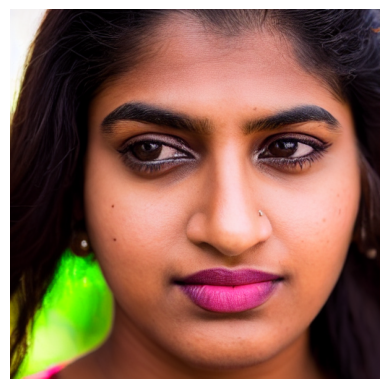

  0%|          | 0/27 [00:00<?, ?it/s]

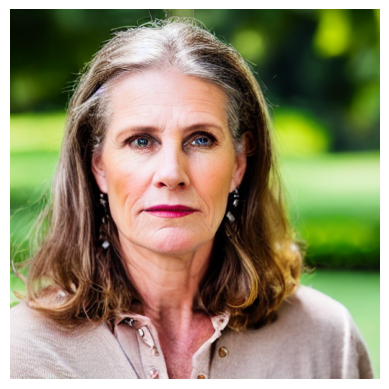

  0%|          | 0/27 [00:00<?, ?it/s]

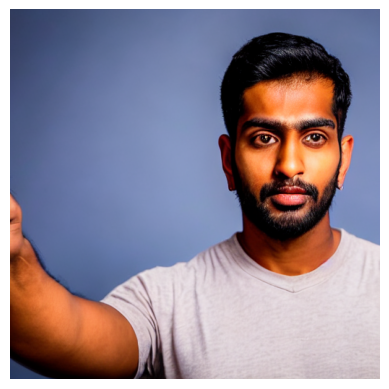

  0%|          | 0/27 [00:00<?, ?it/s]

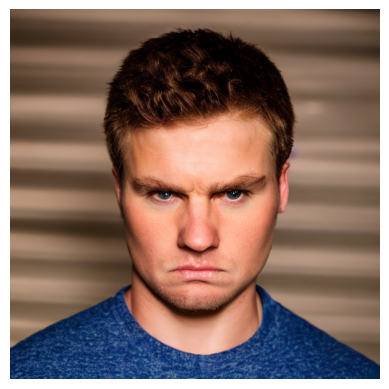

  0%|          | 0/27 [00:00<?, ?it/s]

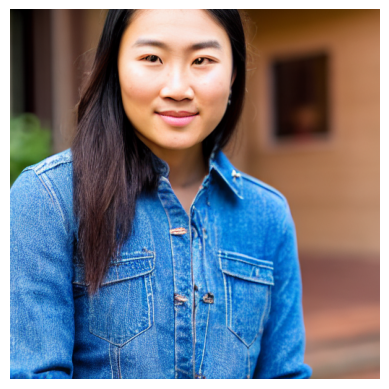

  0%|          | 0/27 [00:00<?, ?it/s]

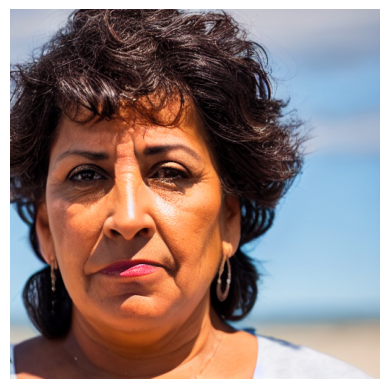

  0%|          | 0/27 [00:00<?, ?it/s]

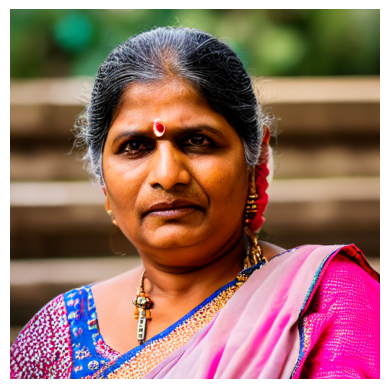

  0%|          | 0/27 [00:00<?, ?it/s]

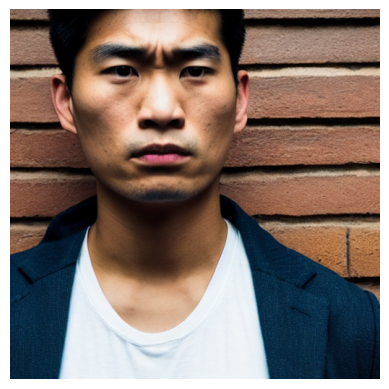

In [5]:
import random
import os
import matplotlib.pyplot as plt
import torch

camera_angles = [
    "front view",
    "slight left angle",
    "slight right angle"
]

lighting = [
    "soft natural lighting",
    "studio lighting",
    "dramatic lighting"
]

ages = [
    "young adult",
    "middle aged"
]

emotion_intensity = {
    "happy": ["slight smile", "big smile, joyful expression"],
    "sad": ["sad expression", "crying, teary eyes"],
    "angry": ["angry", "very angry, clenched jaw"],
    "surprised": ["surprised", "very surprised, wide eyes"]
}

for j in range(2):
    for emotion in emotion_prompts.keys():

        ethnicity = random.choice(ethnicities)
        gender = random.choice(genders)
        age = random.choice(ages)
        camera = random.choice(camera_angles)
        light = random.choice(lighting)
        intensity = random.choice(emotion_intensity[emotion])

        prompt = (
            f"Medium-shot portrait of a {age} {ethnicity} {gender}, "
            f"{intensity}, {camera}, looking at the camera, "
            f"{light}, color photography, photorealistic, "
            "realistic, crisp focus, depth of field, 50mm"
        )

        negative_prompt = (
            "3d, cartoon, anime, sketches, worst quality, low quality, "
            "lowres, monochrome, grayscale, plastic, fake, "
            "disfigured, deformed, blurry, bad anatomy, "
            "watermark, grainy, signature"
        )

        generator = torch.Generator(device="cuda").manual_seed(
            random.randint(0, 10_000)
        )

        img = pipeline(
            prompt,
            negative_prompt=negative_prompt,
            num_inference_steps=27,
            generator=generator
        ).images[0]

        img.save(f"/content/faces/{emotion}/{str(j).zfill(4)}.png")

        plt.imshow(img)
        plt.axis("off")
        plt.show()


In [6]:
!zip -r faces.zip /content/faces

  adding: content/faces/ (stored 0%)
  adding: content/faces/sad/ (stored 0%)
  adding: content/faces/sad/0001.png (deflated 0%)
  adding: content/faces/sad/0000.png (deflated 0%)
  adding: content/faces/happy/ (stored 0%)
  adding: content/faces/happy/0001.png (deflated 0%)
  adding: content/faces/happy/0000.png (deflated 0%)
  adding: content/faces/angry/ (stored 0%)
  adding: content/faces/angry/0001.png (deflated 0%)
  adding: content/faces/angry/0000.png (deflated 0%)
  adding: content/faces/surprised/ (stored 0%)
  adding: content/faces/surprised/0001.png (deflated 0%)
  adding: content/faces/surprised/0000.png (deflated 0%)


In [7]:
# !mkdir -p "/content/gdrive/My Drive/SyntheticDatasetFaceGenerationStableDiffusion"
# !cp faces.zip "/content/gdrive/My Drive/SyntheticDatasetFaceGenerationStableDiffusion/faces.zip"
